In [2]:
import time
from pdp_lib import preprocessing
from pdp_lib import save_pics
from pdp_lib import util
from pdp_lib import processing
from GA_lib import GA
import matplotlib.pyplot as plt
import numpy as np

# Load file (Use realative path)


In [3]:
start_time = time.time()
filename = 'pdp_instances/LiLim/pdp_100/lc101.txt'
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


# Instance File ----> Nodes

--- 0.0030019283294677734 seconds ---


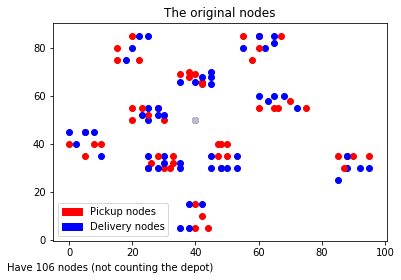

In [11]:
start_time = time.time()
nodes = preprocessing.load_node(filename)
print("--- %s seconds ---" % (time.time() - start_time))

#draw the original nodes
util.draw_original_nodes(nodes)

# Adding Depots

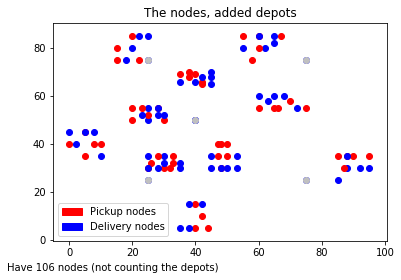

In [12]:
depots=processing.make_depots(nodes)
added_nodes = processing.add_depots_to_nodes(nodes,depots)
util.draw_added_nodes(added_nodes)

# Nodes ----> Requests

--- 0.0 seconds ---


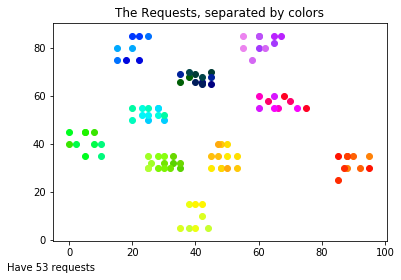

In [75]:
start_time = time.time()
requests = preprocessing.generate_request(nodes)
print("--- %s seconds ---" % (time.time() - start_time))

# draw requests
util.draw_requests(requests)

# Create Distance Table

In [103]:
start_time = time.time()
distances = processing.create_distance_table(nodes)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.025956392288208008 seconds ---


# Clustering requests into Clusters (Requests ----> Clusters)

--- used 0.040001869201660156 seconds ---


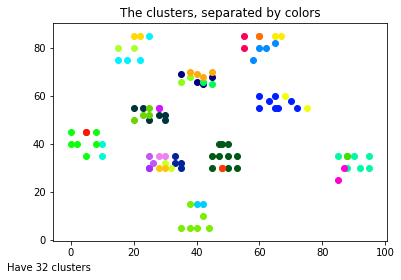

In [104]:
start_time = time.time()
clusters = processing.clustering_requests_only_first(requests)
print("--- used %s seconds ---" % (time.time() - start_time))
util.draw_clusters(clusters)

# Clusters Statistics

In [83]:
one_request_cluster=0
hist=[]
for cluster in clusters:
    hist.append(len(cluster))
    if(len(cluster)==1):
        one_request_cluster+=1
hist = np.array(hist)
plt.hist(hist)
plt.title("Clusters Histogram")
plt.xlabel("Number of Requests")
plt.ylabel("Frequency")
print('Number of one-request clusters = '+str(one_request_cluster))

Number of one-request clusters = 20


average request per cluster =1.65625
Maximum cluster have 5 requests, and is number 2
Unoptimized distances = 564.5927020248383
Below is the cluster with most requests


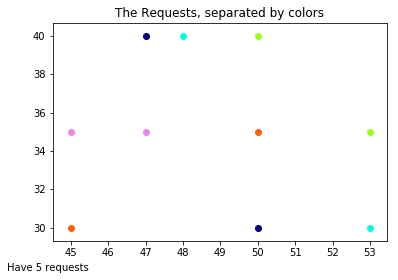

In [87]:

unoptimized_distances = processing.request_distances(requests) 
max_req = -1
sum_req = 0
max_clus_num = -1
i = 0
for cluster in clusters:
    if(len(cluster)>max_req):
        max_req = len(cluster)
        max_clus_num = i 
    sum_req += len(cluster)
    i += 1

print("average request per cluster =" +str(sum_req/len(clusters)))
print("Maximum cluster have "+str(max_req) + " requests, and is number " +str(max_clus_num))
print("Unoptimized distances = "+ str(unoptimized_distances))

print("Below is the cluster with most requests")
util.draw_cluster(clusters[max_clus_num])

In [88]:
util.print_requests(clusters[max_clus_num])

p_node = 67 ,at(47,40),ET = 12 ,LT = 77 ,			d_node = 61 ,at(50,30),ET = 531 ,LT = 610 ,			
p_node = 65 ,at(48,40),ET = 76 ,LT = 129 ,			d_node = 72 ,at(53,30),ET = 450 ,LT = 505 ,			
p_node = 63 ,at(50,40),ET = 171 ,LT = 218 ,			d_node = 74 ,at(53,35),ET = 353 ,LT = 412 ,			
p_node = 62 ,at(50,35),ET = 262 ,LT = 317 ,			d_node = 68 ,at(45,30),ET = 734 ,LT = 777 ,			
p_node = 66 ,at(47,35),ET = 826 ,LT = 875 ,			d_node = 69 ,at(45,35),ET = 916 ,LT = 969 ,			


# Top 5 Clusters


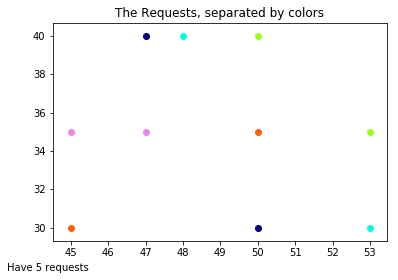

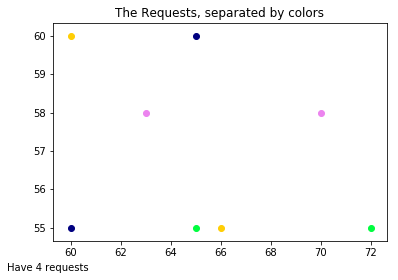

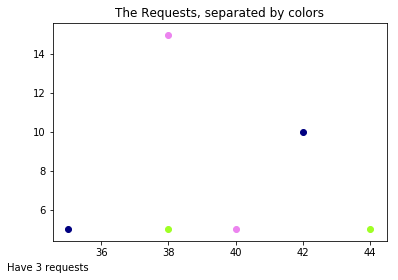

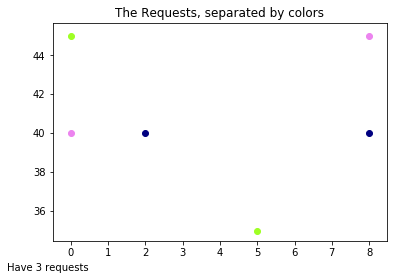

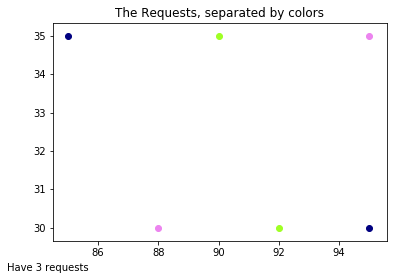

In [94]:
clusters_sorted = clusters
clusters_sorted.sort(key = len)
clusters_sorted.reverse()
for i in range(5):
    util.draw_cluster(clusters_sorted[i])

# Assigning Depots

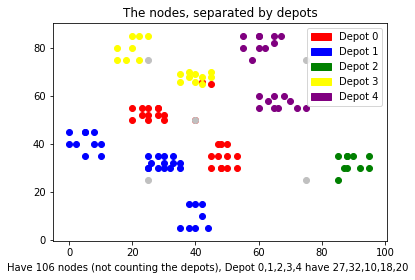

In [97]:
processing.assign_depot(clusters,depots,nodes)
added_nodes=processing.add_depots_to_nodes(nodes, depots)
util.draw_nodes_depots(nodes,depots)

# Total Unoptimized Distance

In [98]:
print(processing.unoptimized_distance(requests,depots))

2032.787520560243


# Solving!!


In [99]:
print(processing.unoptimized_distance(requests,[depots[0]]))

3353.273989692375


In [115]:
distances = processing.create_distance_table(nodes)
start_time = time.time()
# solving the problems !!!!
couples = GA.requests_to_couples(requests)
p_vehicles = GA.create_p_vehicles(couples,N=5)
p_couples = GA.create_p_couples(couples,N=10)
p_couples_vehicles = GA.create_p_couples_vehicles(p_couples,p_vehicles)
p_jobs = GA.create_p_jobs(p_couples_vehicles,N=5)


d = GA.eval_distance(p_jobs, distances, depots[0],nodes)
res = min(d)
index_min = np.argmin(d)
depots = [depots[0]]
print("--- %s seconds ---" % (time.time() - start_time))

print ('Unoptimized Distance = '+str(processing.unoptimized_distance(requests,depots)))
print ('Optimized Distance = '+str(res))


--- 0.14304804801940918 seconds ---
Unoptimized Distance = 3353.273989692375
Optimized Distance = 2741.02238999


In [116]:
print (p_jobs[index_min])

[[51, 101, 32, 31, 63, 74, 50, 23, 103, 11, 38, 52, 98, 97, 106, 92, 93, 86, 91, 1, 64, 102, 84, 89, 9, 95, 57, 19, 15, 20, 24, 100, 56, 59, 71, 77, 79, 80, 81, 70, 82, 87, 30, 21, 55, 76, 73, 83, 35, 39, 13, 17, 4, 34, 99, 85], [6, 2, 36, 43, 41, 65, 5, 7, 90, 25, 27, 16, 14, 42, 40, 54, 60, 105, 96, 94, 62, 68, 44, 46, 72, 45, 88, 48], [78, 29, 104, 53, 58, 66, 3, 75, 18, 12, 26, 49, 47, 69], [67, 61, 33, 37], [28, 8, 10, 22]]
